Make a scatter plot of actual attendance vs season mean attendance

In [7]:
import pandas as pd
import requests
import datetime
import json
import numpy as np
from os.path import isfile
import time

import matplotlib.pyplot as plt
import pylab

In [158]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [12]:
df.loc[5578:5588,'mean_attendance_delta_std']

5578       NaN
5579       NaN
5580       NaN
5581       NaN
5582       NaN
5583       NaN
5584       NaN
5585   -1739.0
5586    -247.0
5587       NaN
5588    3485.0
Name: mean_attendance_delta_std, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4558 entries, 5567 to 22721
Data columns (total 68 columns):
hometeam_name                       4558 non-null object
awayteam_name                       4558 non-null object
home_goals                          4558 non-null int64
away_goals                          4558 non-null int64
match_date                          4558 non-null object
match_timestamp                     4558 non-null int64
match_referee                       4558 non-null object
match_stadium                       4558 non-null object
match_attendance                    4012 non-null float64
home_possession                     4558 non-null float64
away_possession                     4558 non-null float64
home_shotsontarget                  4558 non-null int64
away_shotsontarget                  4558 non-null int64
home_shots                          4558 non-null int64
away_shots                          4558 non-null int64
home_touches                        45

In [159]:
df.dropna(subset=['mean_attendance_delta_std'], inplace=True)

In [181]:
import seaborn as sns

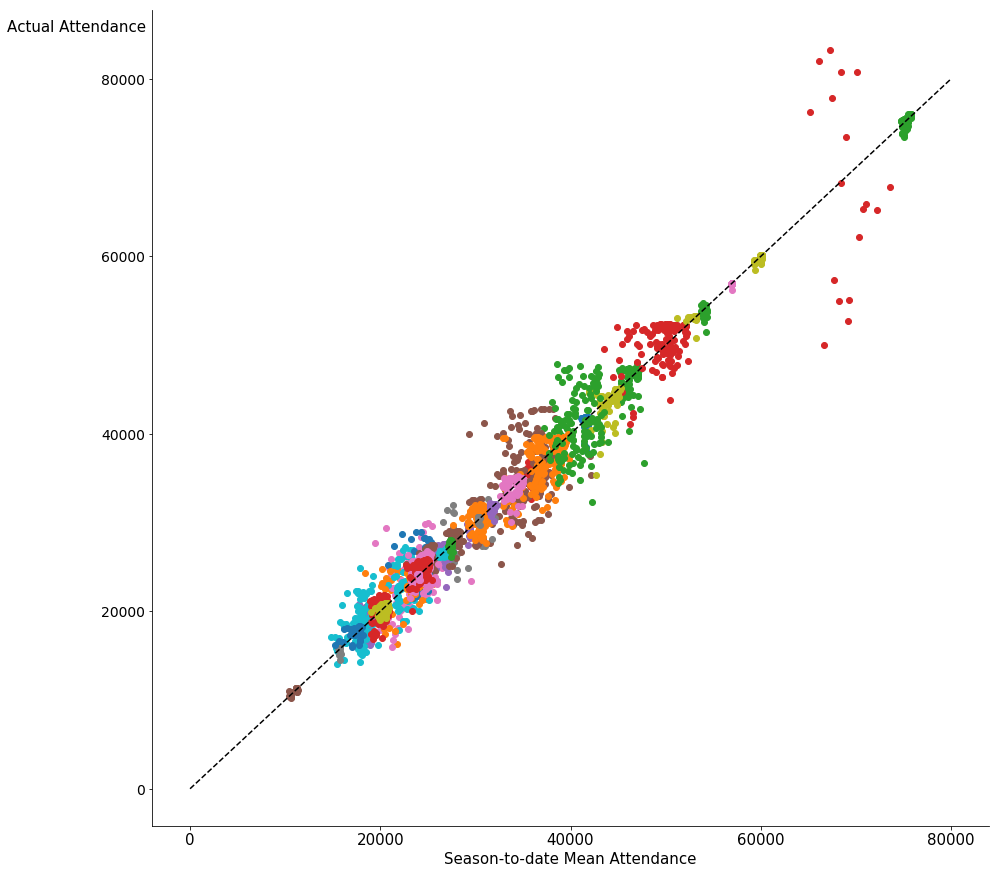

In [188]:
fig, ax = plt.subplots(1,1,figsize=[15,15])
ax.plot(np.arange(1,80000),np.arange(1,80000), color='black', ls='dashed')
for team in df['hometeam_name'].unique():
    ax.scatter(df[df['hometeam_name']==team]['stupid_model'], df[df['hometeam_name']==team]['match_attendance'], label=team)

sns.despine()
plt.xticks(np.arange(0,100000, 20000), size = 15)
plt.yticks(np.arange(0,100000, 20000), size = 14)
plt.ylabel('Actual Attendance', rotation=0, size = 15)
plt.xlabel('Season-to-date Mean Attendance', size = 15)
ax.yaxis.set_label_coords(-0.09, 0.97)
plt.savefig('testfig.png')

In [153]:
df['stupid_model'] = df['match_attendance'] - df['mean_attendance_delta_std']

In [26]:
import statsmodels.api as sm

In [189]:
model = sm.OLS(df['match_attendance'], df['stupid_model'])

KeyError: 'better_model'

In [190]:
res = model.fit()

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       match_attendance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.577e+06
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:54:39   Log-Likelihood:                -31415.
No. Observations:                3518   AIC:                         6.283e+04
Df Residuals:                    3517   BIC:                         6.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
stupid_model     1.0015      0.001   1255.687      0.000       1.000       1.003
==============================================================================
Omnibus:                      756.043   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30659.214
Skew:                           0.047   Prob(JB):                         0.00
Kurtosis:                      17.462   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
df2 = df[df['hometeam_name'] == "Everton"]

In [161]:
model = sm.OLS(df2['match_attendance'], df2['stupid_model'])
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       match_attendance   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 5.320e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          5.95e-208
Time:                        10:05:27   Log-Likelihood:                -1493.3
No. Observations:                 165   AIC:                             2989.
Df Residuals:                     164   BIC:                             2992.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
stupid_model     0.9929      0.004    230.661      0.000       0.984       1.001
==============================================================================
Omnibus:                        3.720   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                4.409
Skew:                          -0.057   Prob(JB):                        0.110
Kurtosis:                       3.793   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

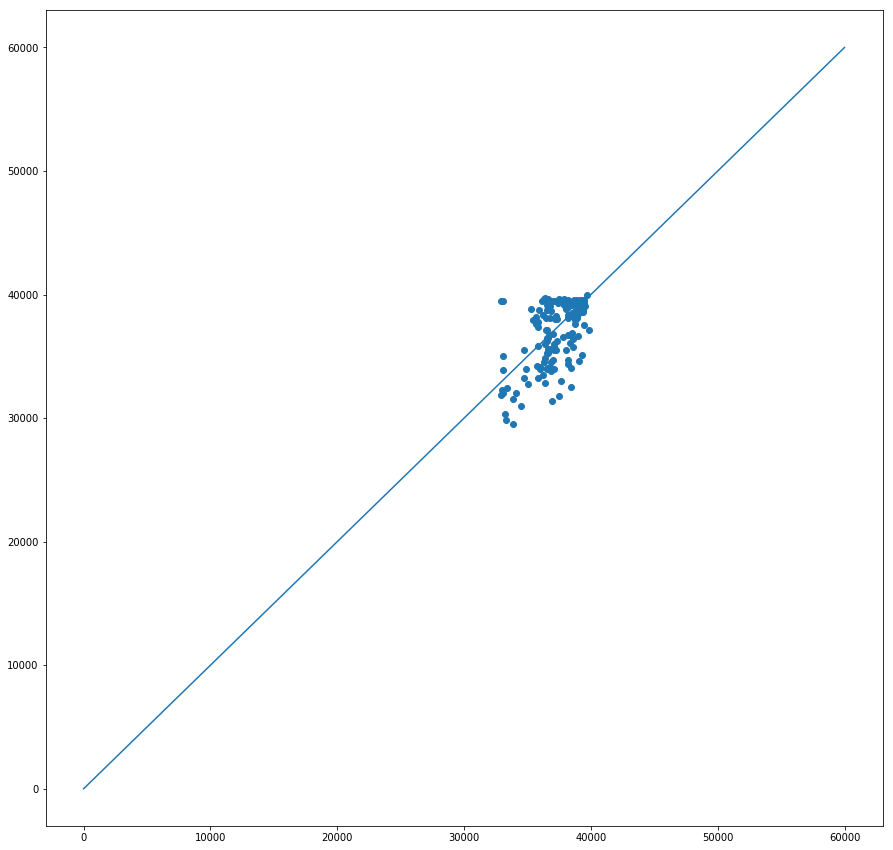

In [162]:
plt.figure(figsize=[15,15])
plt.plot(np.arange(1,60000), np.arange(1,60000))
plt.scatter(df2['stupid_model'], df2['match_attendance'])

In [94]:
df['hometeam_name'].unique()

array(['Charlton Athletic', 'Fulham', 'Manchester City',
       'Tottenham Hotspur', 'Watford', 'Aston Villa', 'Blackburn Rovers',
       'Middlesbrough', 'Arsenal', 'Bolton Wanderers', 'Chelsea',
       'Everton', 'Manchester United', 'Newcastle United', 'Portsmouth',
       'Sheffield United', 'West Ham United', 'Reading', 'Liverpool',
       'Wigan Athletic', 'Birmingham City', 'Hull City', 'Sunderland',
       'Burnley', 'Stoke City', 'Wolverhampton Wanderers',
       'West Bromwich Albion', 'Blackpool', 'Swansea City',
       'Norwich City', 'Queens Park Rangers', 'Southampton',
       'Cardiff City', 'Crystal Palace', 'Leicester City',
       'AFC Bournemouth', 'Huddersfield Town', 'Brighton and Hove Albion'],
      dtype=object)

In [149]:
df[df['hometeam_name'] == 'Aston Villa'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 5592 to 12471
Data columns (total 69 columns):
hometeam_name                       144 non-null object
awayteam_name                       144 non-null object
home_goals                          144 non-null int64
away_goals                          144 non-null int64
match_date                          144 non-null object
match_timestamp                     144 non-null int64
match_referee                       144 non-null object
match_stadium                       144 non-null object
match_attendance                    144 non-null float64
home_possession                     144 non-null float64
away_possession                     144 non-null float64
home_shotsontarget                  144 non-null int64
away_shotsontarget                  144 non-null int64
home_shots                          144 non-null int64
away_shots                          144 non-null int64
home_touches                        144 non-null int64

In [151]:
df[df['season_num']==12]['hometeam_name'].unique()

array(['West Ham United', 'AFC Bournemouth', 'Chelsea', 'Crystal Palace',
       'Huddersfield Town', 'Liverpool', 'Manchester United',
       'Newcastle United', 'Tottenham Hotspur', 'Watford',
       'West Bromwich Albion', 'Arsenal', 'Brighton and Hove Albion',
       'Burnley', 'Everton', 'Leicester City', 'Manchester City',
       'Southampton', 'Stoke City', 'Swansea City'], dtype=object)

In [155]:
with open('PLmatches.csv', 'w') as open_file:
    df.to_csv(open_file)

In [165]:
df['match_stadium'].unique()

array(['The Valley, London', 'Craven Cottage, London',
       'Etihad Stadium, Manchester', 'White Hart Lane, London',
       'Vicarage Road, Watford', 'Villa Park, Birmingham',
       'Ewood Park, Blackburn', 'Riverside Stadium, Middlesbrough',
       'Emirates Stadium, London', 'Macron Stadium, Bolton',
       'Stamford Bridge, London', 'Goodison Park, Liverpool',
       'Old Trafford, Manchester', 'Sports Direct Arena, Newcastle',
       'Fratton Park, Portsmouth', 'Bramall Lane, Sheffield',
       'Boleyn Ground, London', 'Madejski Stadium, Reading',
       'Anfield, Liverpool', 'DW Stadium, Wigan',
       'St Andrews, Birmingham', 'KCOM Stadium, Hull',
       'Stadium of Light, Sunderland', 'Turf Moor, Burnley',
       'bet365 Stadium, Stoke', 'Molineux Stadium, Wolverhampton',
       'The Hawthorns, West Bromwich', 'Bloomfield Road, Blackpool',
       'Liberty Stadium, Swansea', 'Carrow Road, Norwich',
       'Loftus Road, London', "St. James' Park, Newcastle",
       "St. Mary's